In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.ticker as mtick

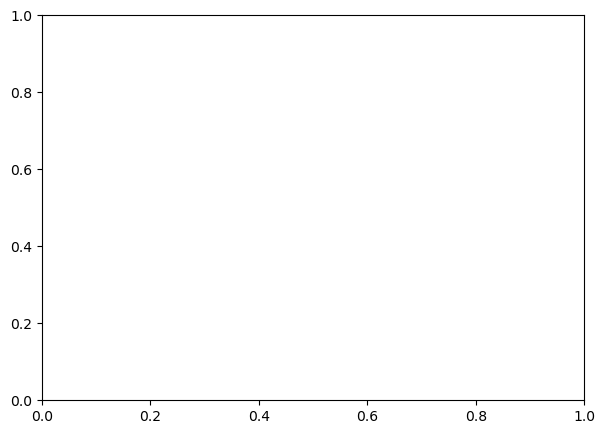

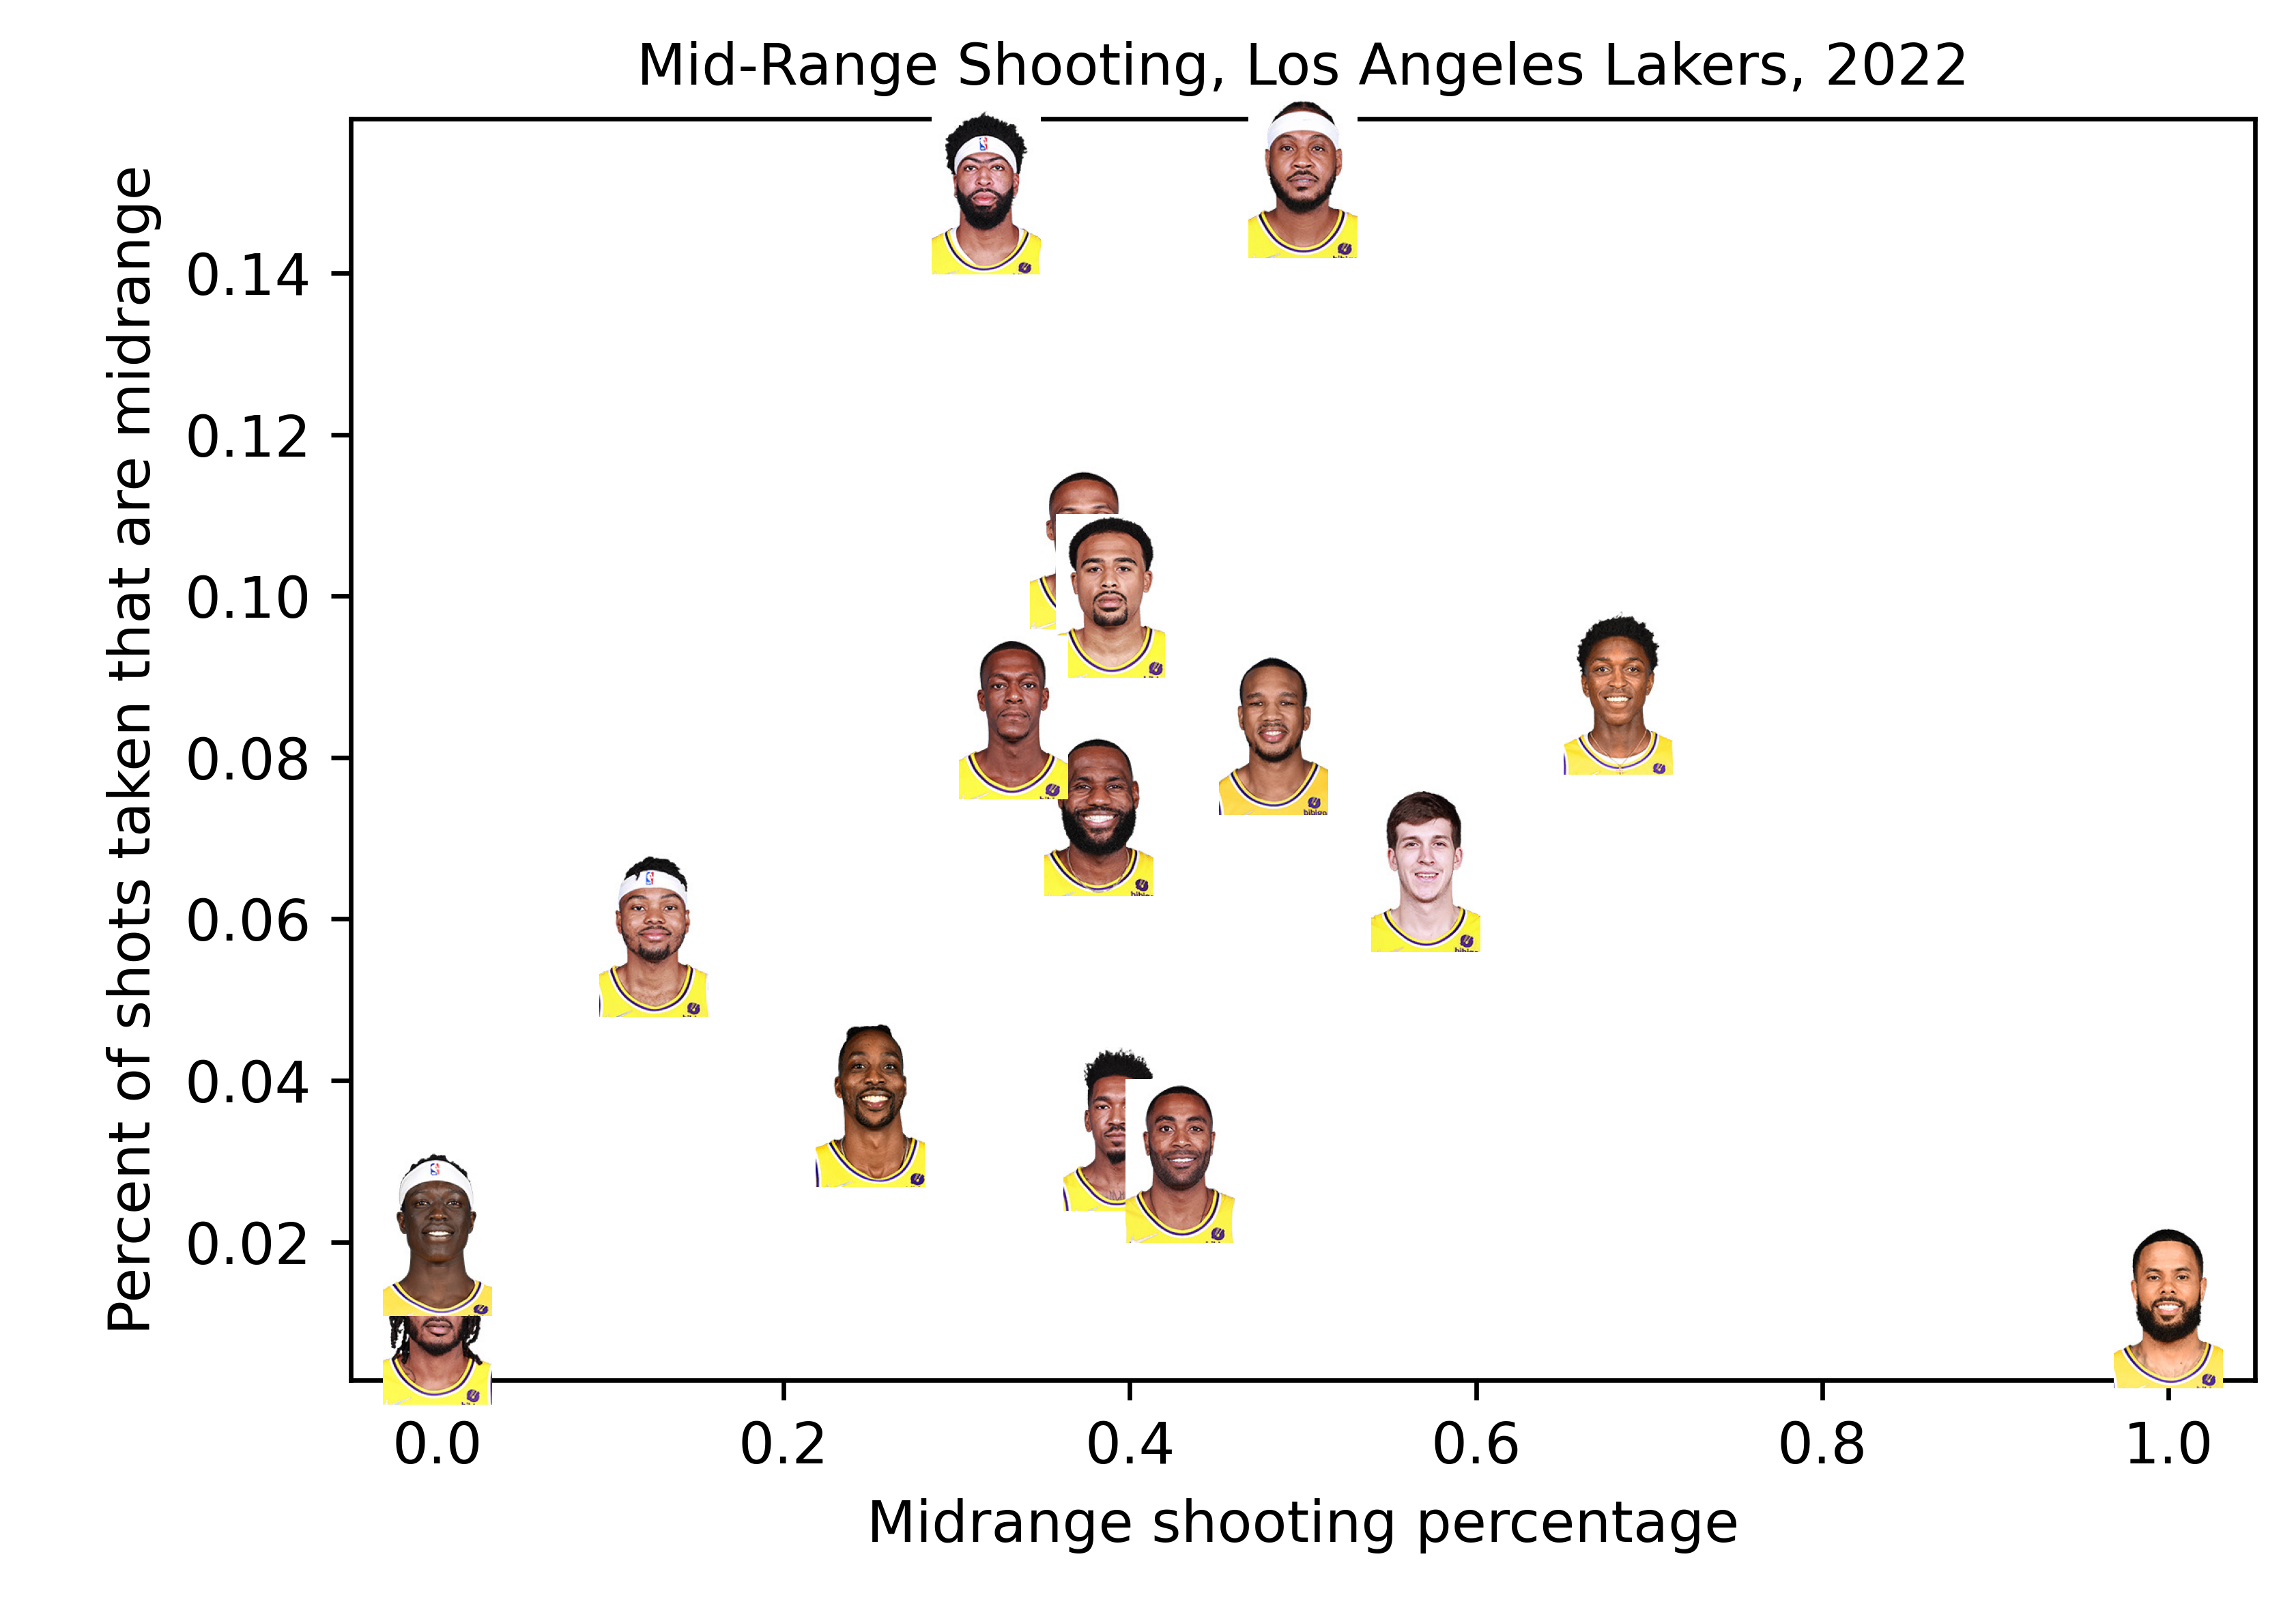

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 13 21:05:23 2022
LAKERS PLOTS
@author: ericd
"""

############################################## LAKERS PLOT ###############################
#create plot area
fig, ax = plt.subplots()

#set plot size
fig.set_size_inches(7,5)

lakers = pd.read_csv('C:\\Users\\ericd\\OneDrive - North Carolina State University\\Desktop\\PersonalProjects\\WNBA Viz\\Lakers\\lakersPerGame.csv')

lakers.head()

lakersShooting = pd.read_csv('C:\\Users\\ericd\\OneDrive - North Carolina State University\\Desktop\\PersonalProjects\\WNBA Viz\\Lakers\\lakersShooting.csv')
lakersShooting.head()

lakers = pd.merge(lakers, lakersShooting, on=['Player'])

lakers = lakers[lakers.Player != 'Isaiah Thomas']
lakers = lakers[lakers.Player != 'Darren Collison']
lakers = lakers[lakers.Player != 'Chaundee Brown Jr.']
lakers = lakers[lakers.Player != 'Sekou Doumbouya']
lakers = lakers[lakers.Player != 'Jemerrio Jones']
lakers = lakers[lakers.Player != 'Mason Jones']

#add path column
lakers['path'] = 'C:/Users/ericd/OneDrive - North Carolina State University/Desktop/PersonalProjects/WNBA Viz/Lakers/'+ lakers['Player']  + '.png'


#headshots
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=0.16, alpha=1)


#mid range percentage FGA and FG% plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=600)
ax.scatter(lakers['10-16Perc'],lakers['10-16Att'], color='white')
ax.set_title('Mid-Range Shooting, Los Angeles Lakers, 2022', size=10)
ax.set_ylabel('Percent of shots taken that are midrange')
ax.set_xlabel('Midrange shooting percentage')



for index, row in lakers.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['10-16Perc'], row['10-16Att']), frameon=False)
    ax.add_artist(ab)